# Análisis ANOVA: Diferencias en Puntuación según Tipo de Anime

## Pregunta de Investigación
**¿Existen diferencias estadísticamente significativas en la Puntuación entre distintos tipos de anime?**

El objetivo es comparar la media de Puntuación según el tipo de obra (TV, Película, OVA, ONA, Especial, etc.) mediante pruebas estadísticas como ANOVA o pruebas no paramétricas si los supuestos no se cumplen.

---

In [51]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, levene, kruskal, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


## 1. Carga y Exploración de Datos

In [52]:
# Cargar los datos
df = pd.read_csv('data.csv')

# Mostrar información general del dataset
print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nColumnas disponibles:\n{df.columns.tolist()}")

# Visualizar las primeras filas
df.head()

INFORMACIÓN GENERAL DEL DATASET
Dimensiones: 21460 filas x 28 columnas

Columnas disponibles:
['ID', 'Title', 'Synonyms', 'Japanese', 'English', 'Synopsis', 'Type', 'Episodes', 'Status', 'Start_Aired', 'End_Aired', 'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres', 'Themes', 'Demographics', 'Duration_Minutes', 'Rating', 'Score', 'Scored_Users', 'Ranked', 'Popularity', 'Members', 'Favorites']


,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


In [53]:
# Seleccionar las columnas de interés para el análisis
# Type: Tipo de anime (TV, Movie, OVA, ONA, Special, etc.)
# Score: Puntuación del anime

# Verificar valores únicos del tipo de anime
print("=" * 60)
print("TIPOS DE ANIME DISPONIBLES")
print("=" * 60)
print(f"Tipos únicos: {df['Type'].unique()}")
print(f"\nDistribución de tipos:")
print(df['Type'].value_counts())

TIPOS DE ANIME DISPONIBLES
Tipos únicos: ['TV' 'Movie' 'ONA' 'OVA' 'Special' 'Music' 'Unknown']

Distribución de tipos:
Type
TV         6280
OVA        3982
Movie      3900
ONA        2803
Special    2422
Music      2028
Unknown      45
Name: count, dtype: int64


In [54]:
# Preparar datos para el análisis ANOVA
# Filtrar solo registros con Score válido (no nulo) y Type válido
df_anova = df[['Type', 'Score']].dropna()

# Verificar información de los datos filtrados
print("=" * 60)
print("DATOS FILTRADOS PARA ANÁLISIS")
print("=" * 60)
print(f"Registros con Score válido: {len(df_anova)}")
print(f"Registros eliminados: {len(df) - len(df_anova)}")
print(f"\nEstadísticas descriptivas del Score:")
print(df_anova['Score'].describe())

DATOS FILTRADOS PARA ANÁLISIS
Registros con Score válido: 14562
Registros eliminados: 6898

Estadísticas descriptivas del Score:
count    14562.000000
mean         6.421724
std          0.910469
min          1.841000
25%          5.791000
50%          6.431000
75%          7.081000
max          9.131000
Name: Score, dtype: float64


## 2. Análisis Descriptivo por Tipo de Anime

In [55]:
# Estadísticas descriptivas por tipo de anime
stats_por_tipo = df_anova.groupby('Type')['Score'].agg([
    ('n', 'count'),
    ('Media', 'mean'),
    ('Desv_Std', 'std'),
    ('Mínimo', 'min'),
    ('Q1', lambda x: x.quantile(0.25)),
    ('Mediana', 'median'),
    ('Q3', lambda x: x.quantile(0.75)),
    ('Máximo', 'max')
]).round(3)

print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS DE PUNTUACIÓN POR TIPO DE ANIME")
print("=" * 80)
stats_por_tipo

ESTADÍSTICAS DESCRIPTIVAS DE PUNTUACIÓN POR TIPO DE ANIME


,n,Media,Desv_Std,Mínimo,Q1,Mediana,Q3,Máximo
Type,,,,,,,,
Movie,2319,6.398,1.079,2.391,5.556,6.441,7.251,9.051
Music,1199,5.885,0.761,3.091,5.351,5.781,6.391,8.401
ONA,1650,6.096,0.885,2.291,5.544,6.061,6.671,8.781
OVA,3192,6.244,0.821,1.841,5.681,6.241,6.801,9.031
Special,1938,6.417,0.742,3.351,5.921,6.431,6.911,8.541
TV,4263,6.847,0.807,2.911,6.311,6.851,7.381,9.131
Unknown,1,6.071,NaN,6.071,6.071,6.071,6.071,6.071


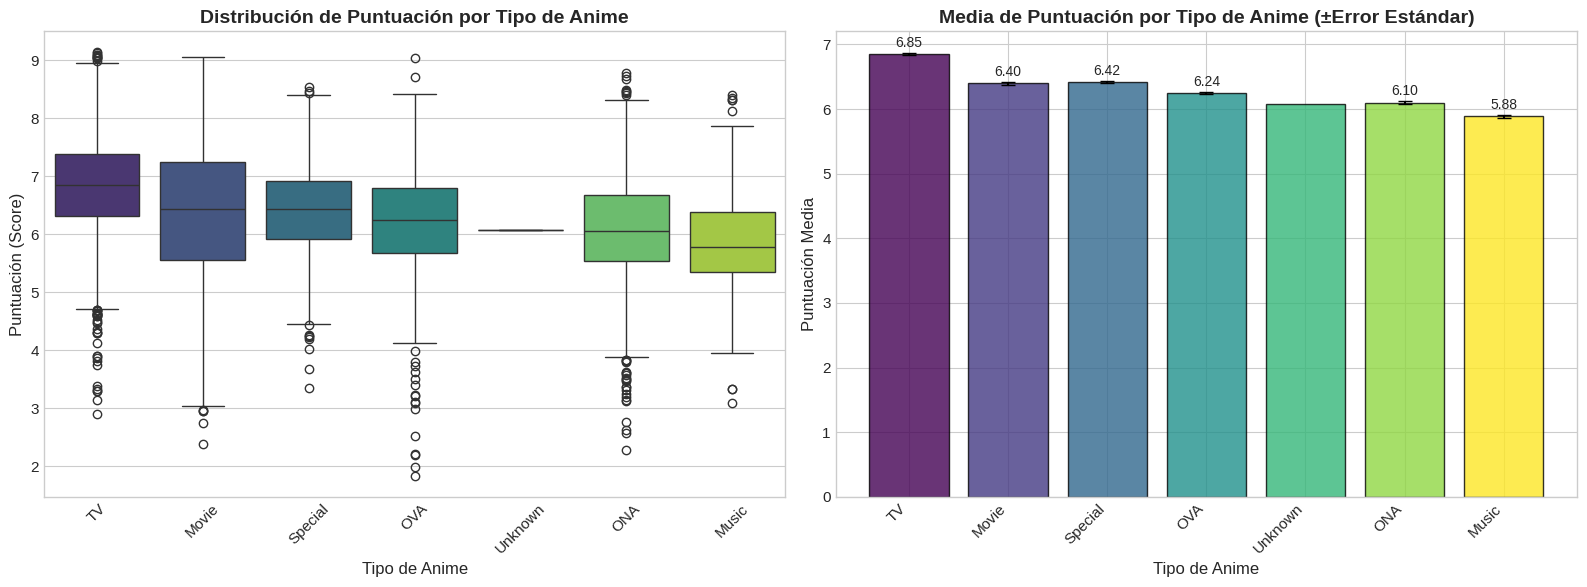

In [56]:
# Visualización 1: Boxplot de puntuaciones por tipo de anime
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
order = df_anova.groupby('Type')['Score'].median().sort_values(ascending=False).index
sns.boxplot(data=df_anova, x='Type', y='Score', order=order, ax=axes[0], palette='viridis')
axes[0].set_title('Distribución de Puntuación por Tipo de Anime', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipo de Anime', fontsize=12)
axes[0].set_ylabel('Puntuación (Score)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras con media y error estándar
medias = df_anova.groupby('Type')['Score'].mean().reindex(order)
errores = df_anova.groupby('Type')['Score'].sem().reindex(order)
colors = plt.cm.viridis(np.linspace(0, 1, len(medias)))

bars = axes[1].bar(range(len(medias)), medias.values, yerr=errores.values, 
                   capsize=5, color=colors, edgecolor='black', alpha=0.8)
axes[1].set_xticks(range(len(medias)))
axes[1].set_xticklabels(medias.index, rotation=45, ha='right')
axes[1].set_title('Media de Puntuación por Tipo de Anime (±Error Estándar)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tipo de Anime', fontsize=12)
axes[1].set_ylabel('Puntuación Media', fontsize=12)

# Agregar valores sobre las barras
for i, (bar, val) in enumerate(zip(bars, medias.values)):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + errores.values[i] + 0.05, 
                 f'{val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

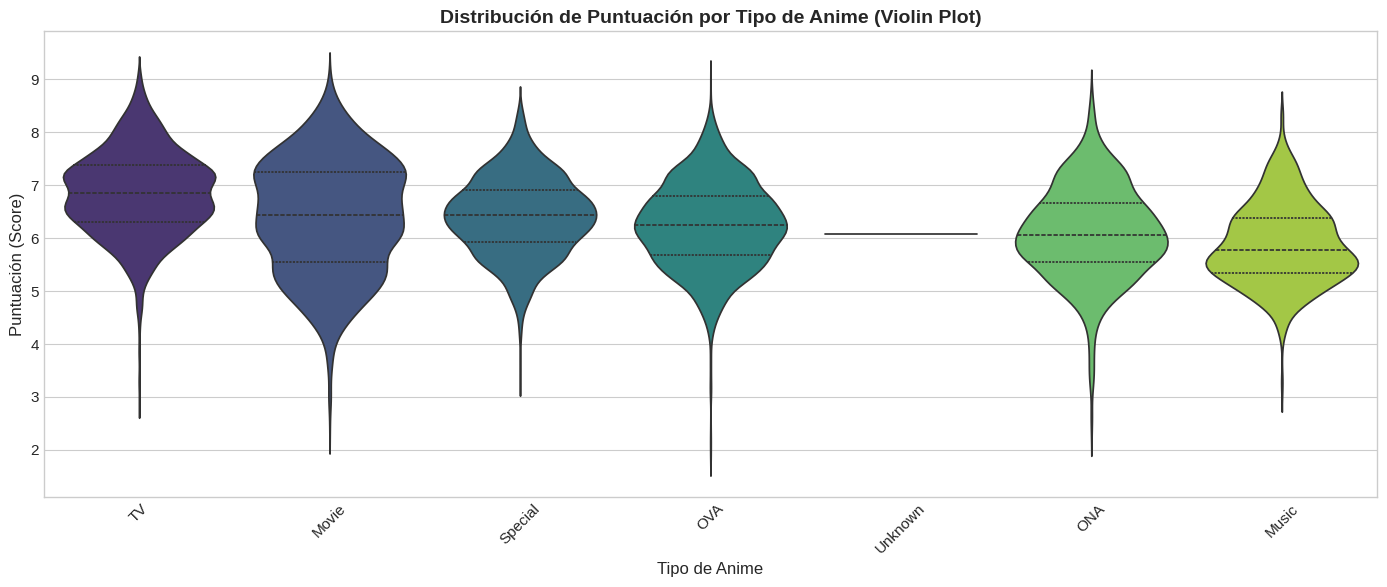

In [57]:
# Visualización 2: Violin plot para ver la distribución completa
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_anova, x='Type', y='Score', order=order, palette='viridis', inner='quartile')
plt.title('Distribución de Puntuación por Tipo de Anime (Violin Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Anime', fontsize=12)
plt.ylabel('Puntuación (Score)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Verificación de Supuestos para ANOVA

Para aplicar ANOVA de un factor, debemos verificar los siguientes supuestos:
1. **Independencia**: Las observaciones son independientes entre sí
2. **Normalidad**: Los datos en cada grupo siguen una distribución normal
3. **Homocedasticidad**: Las varianzas de los grupos son homogéneas

### 3.1 Prueba de Normalidad (Shapiro-Wilk)

In [58]:
# Prueba de normalidad Shapiro-Wilk para cada grupo
# Nota: Shapiro-Wilk tiene un límite de 5000 observaciones, por lo que tomamos una muestra
print("=" * 70)
print("PRUEBA DE NORMALIDAD (SHAPIRO-WILK) POR TIPO DE ANIME")
print("=" * 70)
print("H₀: Los datos siguen una distribución normal")
print("H₁: Los datos NO siguen una distribución normal")
print("α = 0.05")
print("-" * 70)

resultados_normalidad = []

for tipo in df_anova['Type'].unique():
    datos_tipo = df_anova[df_anova['Type'] == tipo]['Score']
    
    # Si hay más de 5000 observaciones, tomar una muestra aleatoria
    if len(datos_tipo) > 5000:
        datos_test = datos_tipo.sample(n=5000, random_state=42)
    else:
        datos_test = datos_tipo
    
    # Realizar prueba de Shapiro-Wilk
    if len(datos_test) >= 3:  # Mínimo 3 observaciones para Shapiro
        stat, p_value = shapiro(datos_test)
        normal = "Sí" if p_value > 0.05 else "No"
        resultados_normalidad.append({
            'Tipo': tipo,
            'n': len(datos_tipo),
            'Estadístico W': round(stat, 4),
            'p-valor': round(p_value, 6),
            '¿Normal?': normal
        })

df_normalidad = pd.DataFrame(resultados_normalidad)
print(df_normalidad.to_string(index=False))
print("-" * 70)
print(f"\n📊 Conclusión: {(df_normalidad['¿Normal?'] == 'No').sum()} de {len(df_normalidad)} grupos NO cumplen normalidad (p < 0.05)")

PRUEBA DE NORMALIDAD (SHAPIRO-WILK) POR TIPO DE ANIME
H₀: Los datos siguen una distribución normal
H₁: Los datos NO siguen una distribución normal
α = 0.05
----------------------------------------------------------------------
   Tipo    n  Estadístico W  p-valor ¿Normal?
     TV 4263         0.9953 0.000000       No
  Movie 2319         0.9892 0.000000       No
    ONA 1650         0.9922 0.000000       No
    OVA 3192         0.9919 0.000000       No
Special 1938         0.9986 0.119318       Sí
  Music 1199         0.9865 0.000000       No
----------------------------------------------------------------------

📊 Conclusión: 5 de 6 grupos NO cumplen normalidad (p < 0.05)


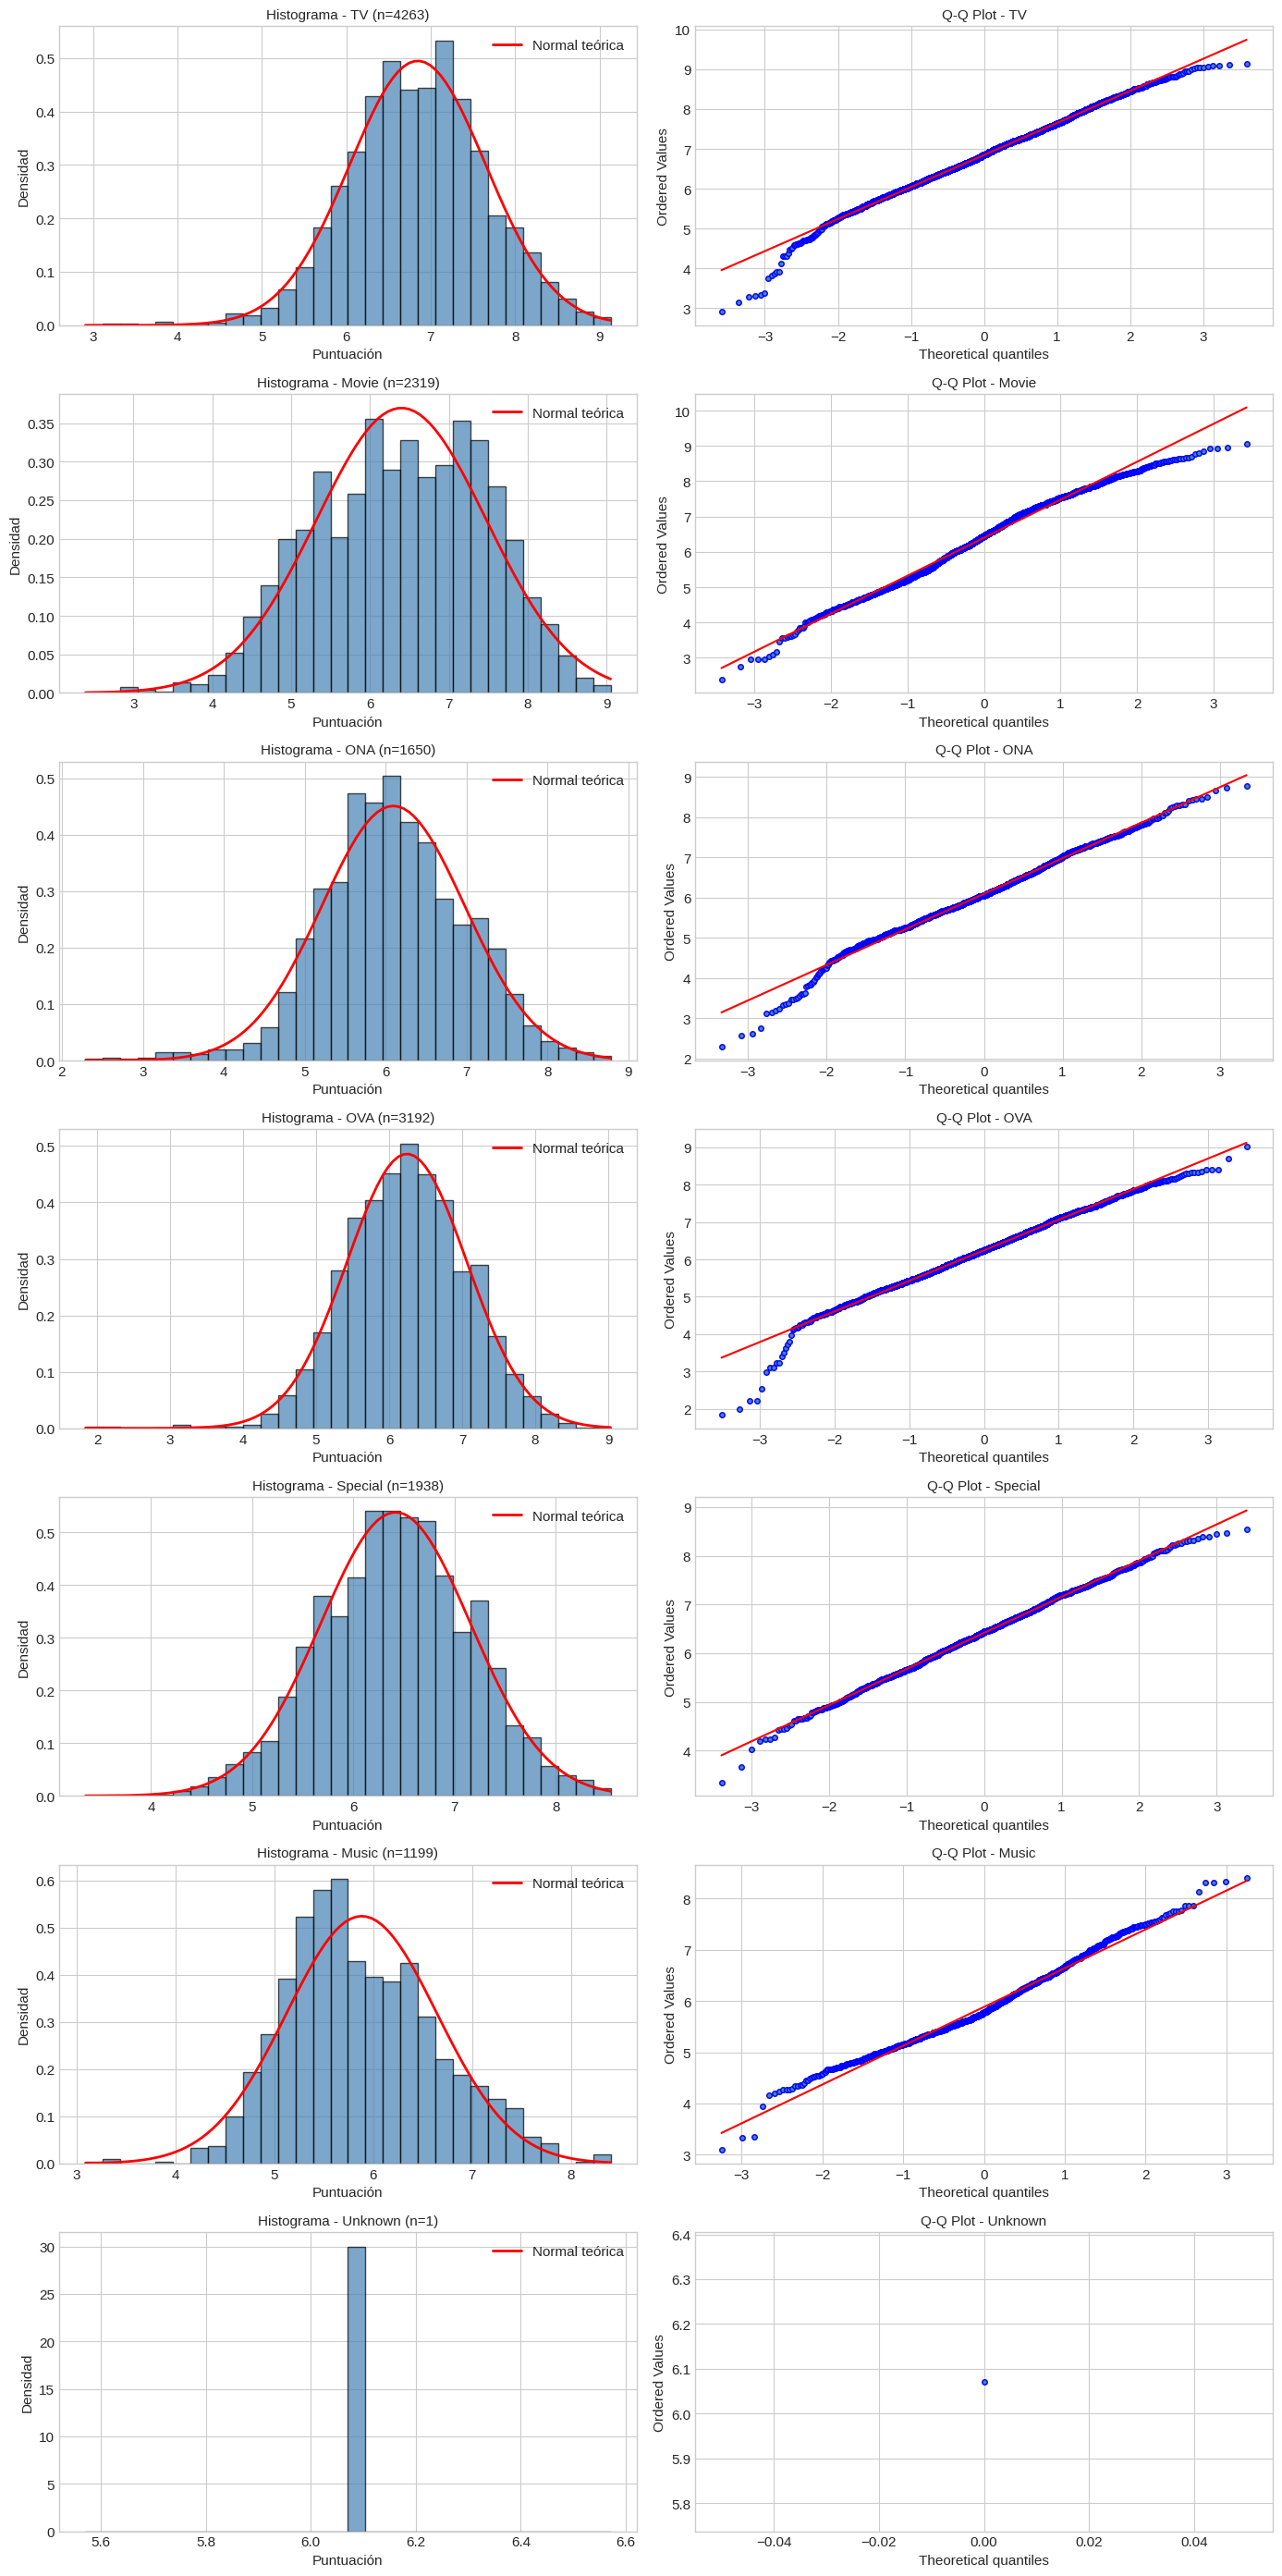

In [59]:
# Visualización de histogramas y Q-Q plots para verificar normalidad
tipos = df_anova['Type'].unique()
n_tipos = len(tipos)

fig, axes = plt.subplots(n_tipos, 2, figsize=(14, 4*n_tipos))

for i, tipo in enumerate(tipos):
    datos = df_anova[df_anova['Type'] == tipo]['Score']
    
    # Histograma
    axes[i, 0].hist(datos, bins=30, edgecolor='black', alpha=0.7, color='steelblue', density=True)
    axes[i, 0].set_title(f'Histograma - {tipo} (n={len(datos)})', fontsize=11)
    axes[i, 0].set_xlabel('Puntuación')
    axes[i, 0].set_ylabel('Densidad')
    
    # Agregar curva normal teórica
    x = np.linspace(datos.min(), datos.max(), 100)
    axes[i, 0].plot(x, stats.norm.pdf(x, datos.mean(), datos.std()), 'r-', lw=2, label='Normal teórica')
    axes[i, 0].legend()
    
    # Q-Q Plot
    stats.probplot(datos, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot - {tipo}', fontsize=11)
    axes[i, 1].get_lines()[0].set_markerfacecolor('steelblue')
    axes[i, 1].get_lines()[0].set_markersize(4)

plt.tight_layout()
plt.show()

### 3.2 Prueba de Homogeneidad de Varianzas (Test de Levene)

In [60]:
# Prueba de Levene para homogeneidad de varianzas
print("=" * 70)
print("PRUEBA DE HOMOGENEIDAD DE VARIANZAS (TEST DE LEVENE)")
print("=" * 70)
print("H₀: Las varianzas de todos los grupos son iguales (homocedasticidad)")
print("H₁: Al menos un grupo tiene varianza diferente (heterocedasticidad)")
print("α = 0.05")
print("-" * 70)

# Preparar los grupos para la prueba de Levene
grupos = [df_anova[df_anova['Type'] == tipo]['Score'].values for tipo in df_anova['Type'].unique()]

# Realizar prueba de Levene
stat_levene, p_levene = levene(*grupos)

print(f"\nEstadístico de Levene: {stat_levene:.4f}")
print(f"p-valor: {p_levene:.6f}")
print("-" * 70)

if p_levene > 0.05:
    print("✅ Conclusión: NO se rechaza H₀. Las varianzas son homogéneas (p > 0.05)")
    homocedasticidad = True
else:
    print("❌ Conclusión: Se rechaza H₀. Las varianzas NO son homogéneas (p < 0.05)")
    homocedasticidad = False

# Mostrar varianzas por grupo
print("\n📊 Varianzas por tipo de anime:")
varianzas = df_anova.groupby('Type')['Score'].var()
for tipo, var in varianzas.items():
    print(f"   {tipo}: {var:.4f}")

PRUEBA DE HOMOGENEIDAD DE VARIANZAS (TEST DE LEVENE)
H₀: Las varianzas de todos los grupos son iguales (homocedasticidad)
H₁: Al menos un grupo tiene varianza diferente (heterocedasticidad)
α = 0.05
----------------------------------------------------------------------

Estadístico de Levene: 87.3291
p-valor: 0.000000
----------------------------------------------------------------------
❌ Conclusión: Se rechaza H₀. Las varianzas NO son homogéneas (p < 0.05)

📊 Varianzas por tipo de anime:
   Movie: 1.1648
   Music: 0.5797
   ONA: 0.7830
   OVA: 0.6737
   Special: 0.5507
   TV: 0.6506
   Unknown: nan


### 3.3 Resumen de Supuestos

In [61]:
# Resumen de verificación de supuestos
print("=" * 70)
print("RESUMEN DE VERIFICACIÓN DE SUPUESTOS PARA ANOVA")
print("=" * 70)

normalidad_cumplida = (df_normalidad['¿Normal?'] == 'Sí').all()

print(f"""
┌─────────────────────────────────────────────────────────────────────┐
│ Supuesto              │ Resultado        │ Cumple                   │
├─────────────────────────────────────────────────────────────────────┤
│ 1. Independencia      │ Asumido          │ ✅ (por diseño)          │
│ 2. Normalidad         │ Shapiro-Wilk     │ {'✅' if normalidad_cumplida else '❌'} (p {'>' if normalidad_cumplida else '<'} 0.05)          │
│ 3. Homocedasticidad   │ Levene           │ {'✅' if homocedasticidad else '❌'} (p {'>' if homocedasticidad else '<'} 0.05)          │
└─────────────────────────────────────────────────────────────────────┘
""")

if not normalidad_cumplida or not homocedasticidad:
    print("⚠️  NOTA: Los supuestos de ANOVA no se cumplen completamente.")
    print("   Se aplicará ANOVA paramétrico Y la prueba no paramétrica de Kruskal-Wallis")
    print("   como alternativa robusta.")
    print("\n   Sin embargo, ANOVA es robusto ante violaciones leves de normalidad")
    print("   cuando los tamaños de muestra son grandes (Teorema Central del Límite).")
else:
    print("✅ Todos los supuestos se cumplen. Se puede aplicar ANOVA paramétrico.")

RESUMEN DE VERIFICACIÓN DE SUPUESTOS PARA ANOVA

┌─────────────────────────────────────────────────────────────────────┐
│ Supuesto              │ Resultado        │ Cumple                   │
├─────────────────────────────────────────────────────────────────────┤
│ 1. Independencia      │ Asumido          │ ✅ (por diseño)          │
│ 2. Normalidad         │ Shapiro-Wilk     │ ❌ (p < 0.05)          │
│ 3. Homocedasticidad   │ Levene           │ ❌ (p < 0.05)          │
└─────────────────────────────────────────────────────────────────────┘

⚠️  NOTA: Los supuestos de ANOVA no se cumplen completamente.
   Se aplicará ANOVA paramétrico Y la prueba no paramétrica de Kruskal-Wallis
   como alternativa robusta.

   Sin embargo, ANOVA es robusto ante violaciones leves de normalidad
   cuando los tamaños de muestra son grandes (Teorema Central del Límite).


## 4. Prueba ANOVA de Un Factor

### Hipótesis:
- **H₀**: μ₁ = μ₂ = μ₃ = ... = μₖ (Las medias de puntuación son iguales para todos los tipos de anime)
- **H₁**: Al menos una media es diferente

### Nivel de significancia: α = 0.05

In [62]:
# Realizar ANOVA de un factor
print("=" * 70)
print("ANOVA DE UN FACTOR: PUNTUACIÓN POR TIPO DE ANIME")
print("=" * 70)

# Preparar grupos para ANOVA
grupos_anova = [grupo['Score'].values for nombre, grupo in df_anova.groupby('Type')]
nombres_grupos = df_anova['Type'].unique()

# Realizar ANOVA
f_stat, p_value_anova = f_oneway(*grupos_anova)

print(f"\nResultados del ANOVA:")
print(f"-" * 40)
print(f"Estadístico F: {f_stat:.4f}")
print(f"p-valor: {p_value_anova:.2e}")
print(f"-" * 40)

# Calcular grados de libertad
k = len(grupos_anova)  # número de grupos
N = sum(len(g) for g in grupos_anova)  # total de observaciones
df_between = k - 1
df_within = N - k

print(f"\nGrados de libertad:")
print(f"   Entre grupos (df₁): {df_between}")
print(f"   Dentro de grupos (df₂): {df_within}")

# Decisión estadística
alpha = 0.05
print(f"\n{'='*40}")
if p_value_anova < alpha:
    print(f"✅ DECISIÓN: Se RECHAZA H₀ (p = {p_value_anova:.2e} < α = {alpha})")
    print(f"\n📊 CONCLUSIÓN: Existen diferencias estadísticamente significativas")
    print(f"   en la puntuación media entre al menos dos tipos de anime.")
else:
    print(f"❌ DECISIÓN: NO se rechaza H₀ (p = {p_value_anova:.4f} > α = {alpha})")
    print(f"\n📊 CONCLUSIÓN: No hay evidencia suficiente para afirmar que existen")
    print(f"   diferencias significativas en la puntuación entre tipos de anime.")

ANOVA DE UN FACTOR: PUNTUACIÓN POR TIPO DE ANIME

Resultados del ANOVA:
----------------------------------------
Estadístico F: 317.1216
p-valor: 0.00e+00
----------------------------------------

Grados de libertad:
   Entre grupos (df₁): 6
   Dentro de grupos (df₂): 14555

✅ DECISIÓN: Se RECHAZA H₀ (p = 0.00e+00 < α = 0.05)

📊 CONCLUSIÓN: Existen diferencias estadísticamente significativas
   en la puntuación media entre al menos dos tipos de anime.


In [63]:
# Calcular tamaño del efecto (Eta cuadrado - η²)
# η² = SS_between / SS_total

# Calcular sumas de cuadrados
media_global = df_anova['Score'].mean()

# SS_total: variación total
ss_total = sum((df_anova['Score'] - media_global)**2)

# SS_between: variación entre grupos
ss_between = sum(len(grupo['Score']) * (grupo['Score'].mean() - media_global)**2 
                 for _, grupo in df_anova.groupby('Type'))

# SS_within: variación dentro de grupos
ss_within = ss_total - ss_between

# Eta cuadrado
eta_squared = ss_between / ss_total

# Omega cuadrado (estimador menos sesgado)
ms_between = ss_between / df_between
ms_within = ss_within / df_within
omega_squared = (ss_between - df_between * ms_within) / (ss_total + ms_within)

print("=" * 70)
print("TAMAÑO DEL EFECTO")
print("=" * 70)
print(f"\n📊 Tabla ANOVA Completa:")
print(f"-" * 70)
print(f"{'Fuente':<20} {'SS':>15} {'df':>8} {'MS':>15} {'F':>10}")
print(f"-" * 70)
print(f"{'Entre grupos':<20} {ss_between:>15.2f} {df_between:>8} {ms_between:>15.2f} {f_stat:>10.2f}")
print(f"{'Dentro de grupos':<20} {ss_within:>15.2f} {df_within:>8} {ms_within:>15.2f} {'-':>10}")
print(f"{'Total':<20} {ss_total:>15.2f} {N-1:>8} {'-':>15} {'-':>10}")
print(f"-" * 70)

print(f"\n📏 Medidas del tamaño del efecto:")
print(f"   η² (Eta cuadrado):    {eta_squared:.4f} ({eta_squared*100:.2f}%)")
print(f"   ω² (Omega cuadrado):  {omega_squared:.4f} ({omega_squared*100:.2f}%)")

print(f"\n📋 Interpretación del tamaño del efecto (Cohen, 1988):")
print(f"   Pequeño: η² ≈ 0.01 | Mediano: η² ≈ 0.06 | Grande: η² ≈ 0.14")

if eta_squared < 0.01:
    efecto = "muy pequeño"
elif eta_squared < 0.06:
    efecto = "pequeño"
elif eta_squared < 0.14:
    efecto = "mediano"
else:
    efecto = "grande"

print(f"\n   ➡️  El efecto observado es: {efecto.upper()}")

TAMAÑO DEL EFECTO

📊 Tabla ANOVA Completa:
----------------------------------------------------------------------
Fuente                            SS       df              MS          F
----------------------------------------------------------------------
Entre grupos                 1395.50        6          232.58     317.12
Dentro de grupos            10674.90    14555            0.73          -
Total                       12070.40    14561               -          -
----------------------------------------------------------------------

📏 Medidas del tamaño del efecto:
   η² (Eta cuadrado):    0.1156 (11.56%)
   ω² (Omega cuadrado):  0.1152 (11.52%)

📋 Interpretación del tamaño del efecto (Cohen, 1988):
   Pequeño: η² ≈ 0.01 | Mediano: η² ≈ 0.06 | Grande: η² ≈ 0.14

   ➡️  El efecto observado es: MEDIANO


## 5. Prueba No Paramétrica: Kruskal-Wallis

Como alternativa robusta cuando los supuestos de ANOVA no se cumplen completamente, aplicamos la prueba de Kruskal-Wallis, que es la versión no paramétrica del ANOVA de un factor.

In [64]:
# Prueba de Kruskal-Wallis (alternativa no paramétrica)
print("=" * 70)
print("PRUEBA DE KRUSKAL-WALLIS (No paramétrica)")
print("=" * 70)
print("H₀: Las distribuciones de puntuación son iguales en todos los tipos")
print("H₁: Al menos una distribución difiere")
print("α = 0.05")
print("-" * 70)

# Realizar prueba de Kruskal-Wallis
h_stat, p_kruskal = kruskal(*grupos_anova)

print(f"\nResultados:")
print(f"   Estadístico H: {h_stat:.4f}")
print(f"   p-valor: {p_kruskal:.2e}")
print(f"-" * 70)

# Calcular tamaño del efecto para Kruskal-Wallis (Epsilon cuadrado)
# ε² = H / (N - 1)
epsilon_squared = h_stat / (N - 1)

print(f"\n📏 Tamaño del efecto:")
print(f"   ε² (Epsilon cuadrado): {epsilon_squared:.4f}")
print(f"   Interpretación: Pequeño ≈ 0.01 | Mediano ≈ 0.06 | Grande ≈ 0.14")

# Decisión
if p_kruskal < alpha:
    print(f"\n✅ DECISIÓN: Se RECHAZA H₀ (p = {p_kruskal:.2e} < α = {alpha})")
    print(f"\n📊 CONCLUSIÓN: La prueba no paramétrica confirma que existen")
    print(f"   diferencias significativas en las puntuaciones entre tipos de anime.")
else:
    print(f"\n❌ DECISIÓN: NO se rechaza H₀ (p = {p_kruskal:.4f} > α = {alpha})")
    print(f"\n📊 CONCLUSIÓN: No hay evidencia de diferencias significativas.")

PRUEBA DE KRUSKAL-WALLIS (No paramétrica)
H₀: Las distribuciones de puntuación son iguales en todos los tipos
H₁: Al menos una distribución difiere
α = 0.05
----------------------------------------------------------------------

Resultados:
   Estadístico H: 1759.0967
   p-valor: 0.00e+00
----------------------------------------------------------------------

📏 Tamaño del efecto:
   ε² (Epsilon cuadrado): 0.1208
   Interpretación: Pequeño ≈ 0.01 | Mediano ≈ 0.06 | Grande ≈ 0.14

✅ DECISIÓN: Se RECHAZA H₀ (p = 0.00e+00 < α = 0.05)

📊 CONCLUSIÓN: La prueba no paramétrica confirma que existen
   diferencias significativas en las puntuaciones entre tipos de anime.


## 6. Análisis Post-Hoc: Comparaciones Múltiples

Dado que ANOVA solo nos indica si hay diferencias, pero no entre qué grupos específicos, realizamos pruebas post-hoc para identificar qué tipos de anime difieren significativamente entre sí.

In [65]:
# Análisis Post-Hoc: Prueba de Tukey HSD
from scipy.stats import tukey_hsd

print("=" * 70)
print("ANÁLISIS POST-HOC: PRUEBA DE TUKEY HSD")
print("=" * 70)
print("Comparaciones múltiples entre todos los pares de tipos de anime")
print("Corrección para controlar el error tipo I en comparaciones múltiples")
print("-" * 70)

# Filtrar grupos con tamaño de muestra insuficiente (n < 2)
min_sample_size = 2
tipos_validos = []
grupos_tukey = []

print(f"\n⚠️  Filtrado de grupos con n < {min_sample_size}:")
for tipo in df_anova['Type'].unique():
    datos = df_anova[df_anova['Type'] == tipo]['Score'].values
    if len(datos) >= min_sample_size:
        tipos_validos.append(tipo)
        grupos_tukey.append(datos)
    else:
        print(f"   • Excluido '{tipo}': n = {len(datos)}")

print(f"\n✅ Tipos incluidos en el análisis: {len(tipos_validos)}")
print("-" * 70)

# Verificar que hay suficientes grupos
if len(grupos_tukey) < 2:
    print("\n❌ Error: Se necesitan al menos 2 grupos para comparar.")
else:
    # Realizar prueba de Tukey HSD
    result = tukey_hsd(*grupos_tukey)
    
    # Crear matriz de resultados
    n_tipos = len(tipos_validos)
    
    # Crear DataFrame con los resultados de Tukey
    comparaciones = []
    for i in range(n_tipos):
        for j in range(i+1, n_tipos):
            tipo1 = tipos_validos[i]
            tipo2 = tipos_validos[j]
            
            # Obtener estadísticos
            media1 = df_anova[df_anova['Type'] == tipo1]['Score'].mean()
            media2 = df_anova[df_anova['Type'] == tipo2]['Score'].mean()
            diff = media1 - media2
            
            # p-valor de la comparación
            p_val = result.pvalue[i, j]
            
            significativo = "Sí" if p_val < 0.05 else "No"
            
            comparaciones.append({
                'Grupo 1': tipo1,
                'Grupo 2': tipo2,
                'Media 1': round(media1, 3),
                'Media 2': round(media2, 3),
                'Diferencia': round(diff, 3),
                'p-valor': f"{p_val:.4f}" if p_val >= 0.0001 else f"{p_val:.2e}",
                'Significativo': significativo
            })
    
    df_tukey = pd.DataFrame(comparaciones)
    print("\n📊 Comparaciones par a par:")
    print(df_tukey.to_string(index=False))
    
    # Contar comparaciones significativas
    n_sig = (df_tukey['Significativo'] == 'Sí').sum()
    n_total = len(df_tukey)
    print(f"\n📈 Resumen: {n_sig} de {n_total} comparaciones son significativas (p < 0.05)")


ANÁLISIS POST-HOC: PRUEBA DE TUKEY HSD
Comparaciones múltiples entre todos los pares de tipos de anime
Corrección para controlar el error tipo I en comparaciones múltiples
----------------------------------------------------------------------

⚠️  Filtrado de grupos con n < 2:


   • Excluido 'Unknown': n = 1

✅ Tipos incluidos en el análisis: 6
----------------------------------------------------------------------

📊 Comparaciones par a par:
Grupo 1 Grupo 2  Media 1  Media 2  Diferencia  p-valor Significativo
     TV   Movie    6.847    6.398       0.449 2.43e-12            Sí
     TV     ONA    6.847    6.096       0.751 2.43e-12            Sí
     TV     OVA    6.847    6.244       0.604 2.43e-12            Sí
     TV Special    6.847    6.417       0.431 2.43e-12            Sí
     TV   Music    6.847    5.885       0.962 2.43e-12            Sí
  Movie     ONA    6.398    6.096       0.302 2.43e-12            Sí
  Movie     OVA    6.398    6.244       0.155 5.16e-10            Sí
  Movie Special    6.398    6.417      -0.018   0.9828            No
  Movie   Music    6.398    5.885       0.514 2.43e-12            Sí
    ONA     OVA    6.096    6.244      -0.148 2.05e-07            Sí
    ONA Special    6.096    6.417      -0.321 2.43e-12            Sí
    O

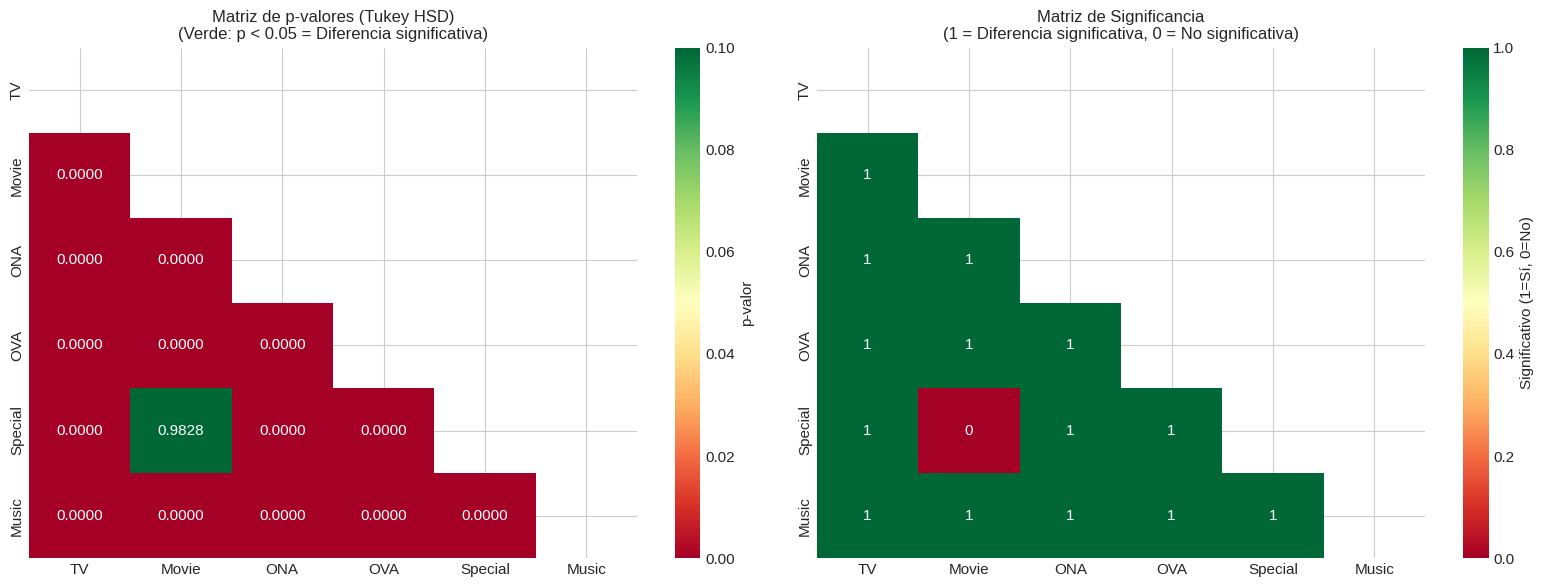

In [66]:
# Visualización de comparaciones post-hoc: Heatmap de p-valores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Crear matriz de p-valores
p_matrix = np.zeros((n_tipos, n_tipos))
for i in range(n_tipos):
    for j in range(n_tipos):
        if i != j:
            p_matrix[i, j] = result.pvalue[i, j]
        else:
            p_matrix[i, j] = 1.0

# Heatmap de p-valores
mask = np.triu(np.ones_like(p_matrix, dtype=bool), k=0)
sns.heatmap(p_matrix, annot=True, fmt='.4f', cmap='RdYlGn', 
            xticklabels=tipos_validos, yticklabels=tipos_validos,
            mask=mask, vmin=0, vmax=0.1, ax=axes[0],
            cbar_kws={'label': 'p-valor'})
axes[0].set_title('Matriz de p-valores (Tukey HSD)\n(Verde: p < 0.05 = Diferencia significativa)', fontsize=12)

# Crear matriz de significancia
sig_matrix = (p_matrix < 0.05).astype(int)
sns.heatmap(sig_matrix, annot=True, fmt='d', cmap='RdYlGn',
            xticklabels=tipos_validos, yticklabels=tipos_validos,
            mask=mask, ax=axes[1], vmin=0, vmax=1,
            cbar_kws={'label': 'Significativo (1=Sí, 0=No)'})
axes[1].set_title('Matriz de Significancia\n(1 = Diferencia significativa, 0 = No significativa)', fontsize=12)

plt.tight_layout()
plt.show()


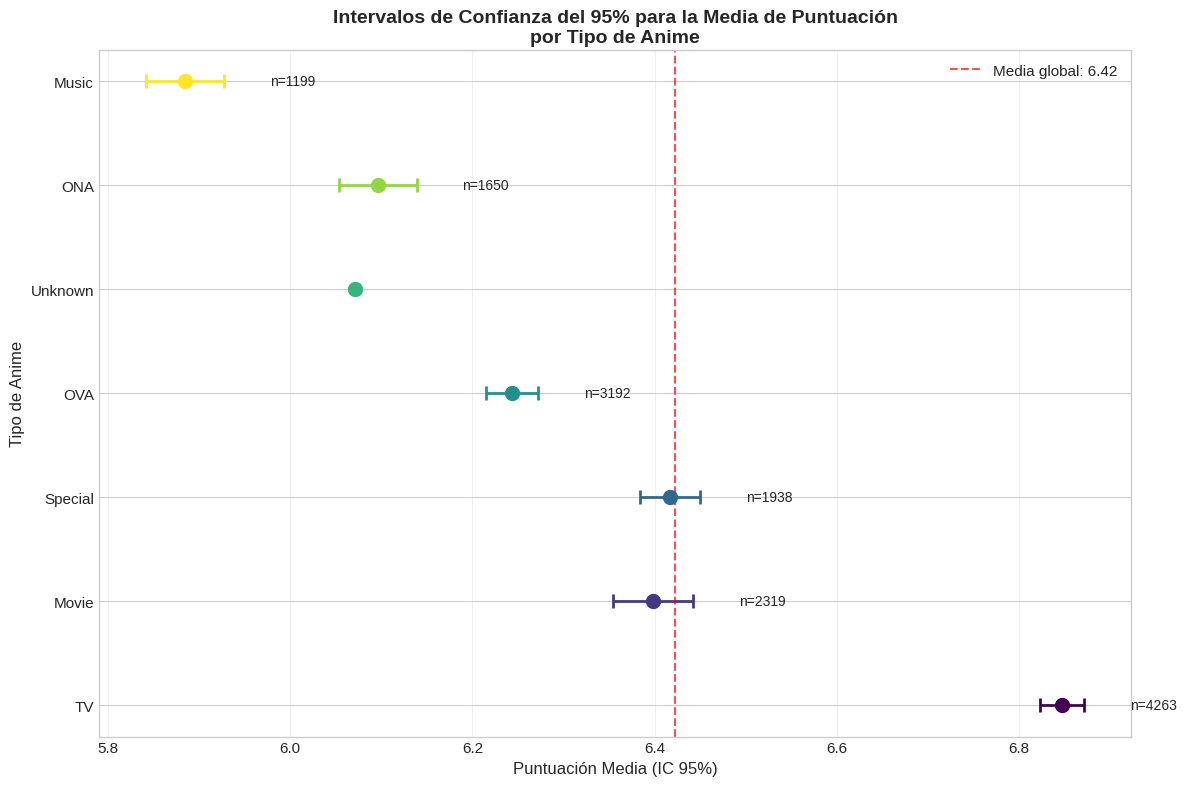

In [67]:
# Gráfico de intervalos de confianza por grupo
from scipy.stats import t

fig, ax = plt.subplots(figsize=(12, 8))

# Calcular intervalos de confianza del 95%
stats_ci = []
for tipo in order:  # Usar el orden por mediana
    datos = df_anova[df_anova['Type'] == tipo]['Score']
    n = len(datos)
    media = datos.mean()
    se = datos.std() / np.sqrt(n)
    ci = t.ppf(0.975, n-1) * se
    stats_ci.append({
        'Tipo': tipo,
        'Media': media,
        'CI_lower': media - ci,
        'CI_upper': media + ci,
        'n': n
    })

df_ci = pd.DataFrame(stats_ci)

# Crear gráfico
colors = plt.cm.viridis(np.linspace(0, 1, len(df_ci)))
y_pos = range(len(df_ci))

for i, (idx, row) in enumerate(df_ci.iterrows()):
    ax.errorbar(row['Media'], i, xerr=[[row['Media'] - row['CI_lower']], [row['CI_upper'] - row['Media']]], 
                fmt='o', color=colors[i], capsize=5, capthick=2, markersize=10, elinewidth=2)
    ax.text(row['CI_upper'] + 0.05, i, f"n={row['n']}", va='center', fontsize=10)

ax.set_yticks(y_pos)
ax.set_yticklabels(df_ci['Tipo'])
ax.set_xlabel('Puntuación Media (IC 95%)', fontsize=12)
ax.set_ylabel('Tipo de Anime', fontsize=12)
ax.set_title('Intervalos de Confianza del 95% para la Media de Puntuación\npor Tipo de Anime', fontsize=14, fontweight='bold')
ax.axvline(x=df_anova['Score'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Media global: {df_anova["Score"].mean():.2f}')
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Resumen y Conclusiones

In [68]:
# Resumen final del análisis
print("=" * 80)
print("RESUMEN DEL ANÁLISIS ANOVA: PUNTUACIÓN POR TIPO DE ANIME")
print("=" * 80)

print("""
┌────────────────────────────────────────────────────────────────────────────────┐
│                           PREGUNTA DE INVESTIGACIÓN                            │
├────────────────────────────────────────────────────────────────────────────────┤
│ ¿Existen diferencias estadísticamente significativas en la Puntuación entre    │
│ distintos tipos de anime (TV, Película, OVA, ONA, Especial, etc.)?             │
└────────────────────────────────────────────────────────────────────────────────┘
""")

print("📋 METODOLOGÍA APLICADA:")
print("-" * 80)
print("   1. Análisis exploratorio y estadísticas descriptivas por tipo")
print("   2. Verificación de supuestos (Normalidad: Shapiro-Wilk, Homocedasticidad: Levene)")
print("   3. ANOVA de un factor (paramétrico)")
print("   4. Prueba de Kruskal-Wallis (no paramétrico)")
print("   5. Análisis post-hoc con prueba de Tukey HSD")

print(f"""
📊 RESULTADOS PRINCIPALES:
{'-' * 80}
   • Muestra analizada: {len(df_anova):,} animes con puntuación válida
   • Número de tipos de anime: {len(df_anova['Type'].unique())}
   
   ANOVA de un factor:
   • Estadístico F = {f_stat:.2f}
   • p-valor = {p_value_anova:.2e}
   • Tamaño del efecto η² = {eta_squared:.4f} ({efecto})
   
   Kruskal-Wallis (No paramétrico):
   • Estadístico H = {h_stat:.2f}
   • p-valor = {p_kruskal:.2e}
""")

# Ranking de tipos por media
print("📈 RANKING DE TIPOS DE ANIME POR PUNTUACIÓN MEDIA:")
print("-" * 80)
ranking = df_anova.groupby('Type')['Score'].agg(['mean', 'count']).sort_values('mean', ascending=False)
ranking.columns = ['Media', 'n']
for i, (tipo, row) in enumerate(ranking.iterrows(), 1):
    print(f"   {i}. {tipo}: {row['Media']:.3f} (n={int(row['n']):,})")

print(f"""
{'=' * 80}
                              CONCLUSIÓN FINAL
{'=' * 80}

{'✅' if p_value_anova < 0.05 else '❌'} Respuesta a la pregunta de investigación:
   
   {'SÍ' if p_value_anova < 0.05 else 'NO'} existen diferencias estadísticamente significativas en la puntuación
   media entre los distintos tipos de anime (p {'<' if p_value_anova < 0.05 else '>'} 0.05).
   
   Tanto el ANOVA paramétrico (F = {f_stat:.2f}, p = {p_value_anova:.2e}) como la prueba
   no paramétrica de Kruskal-Wallis (H = {h_stat:.2f}, p = {p_kruskal:.2e}) {'coinciden' if (p_value_anova < 0.05) == (p_kruskal < 0.05) else 'difieren'}
   en este resultado.
   
   El tamaño del efecto (η² = {eta_squared:.4f}) indica que el tipo de anime explica
   aproximadamente el {eta_squared*100:.1f}% de la varianza en las puntuaciones,
   lo cual representa un efecto {efecto}.

{'=' * 80}
""")

RESUMEN DEL ANÁLISIS ANOVA: PUNTUACIÓN POR TIPO DE ANIME

┌────────────────────────────────────────────────────────────────────────────────┐
│                           PREGUNTA DE INVESTIGACIÓN                            │
├────────────────────────────────────────────────────────────────────────────────┤
│ ¿Existen diferencias estadísticamente significativas en la Puntuación entre    │
│ distintos tipos de anime (TV, Película, OVA, ONA, Especial, etc.)?             │
└────────────────────────────────────────────────────────────────────────────────┘

📋 METODOLOGÍA APLICADA:
--------------------------------------------------------------------------------
   1. Análisis exploratorio y estadísticas descriptivas por tipo
   2. Verificación de supuestos (Normalidad: Shapiro-Wilk, Homocedasticidad: Levene)
   3. ANOVA de un factor (paramétrico)
   4. Prueba de Kruskal-Wallis (no paramétrico)
   5. Análisis post-hoc con prueba de Tukey HSD

📊 RESULTADOS PRINCIPALES:
--------------------------